<a href="https://colab.research.google.com/github/Govind216/Football-Data-Visualization/blob/main/DV_REVIEW2_heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install highlight_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup
import json
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from highlight_text import fig_text
from matplotlib.patches import Arc
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import re

<a id="3."></a>
# Scraping shots
In order to scrape all shots taken by each player from la liga, we must first scrape their IDs and change their data type from obj to int and then run a loop with those values to scrape all the shots the players have taken throughout their careers.

<a id="3.1"></a>
## Scraping the match IDs

In [ ]:
# Entering the league's  link
link = "https://understat.com/league/La_liga"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the players stats 
strings = scripts[3].string 
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)
# Creating the dataframe
all_shots = pd.DataFrame(data)
# Changing the data type using pd.to_numeric() function
all_shots["id"] = pd.to_numeric(all_shots["id"])
idd = all_shots["id"].values.tolist()

<a id="3.2"></a>
## Understat for loops
Once the match IDs have scraped, let's run the loop , it'll take around 10 minutes : 

In [ ]:
shoots = pd.DataFrame()
for i in tqdm(idd):
    url = f"https://understat.com/player/{i}"
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    scripts = soup.find_all('script')
    strings = scripts[3].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    data = json.loads(json_data)
    shoots = shoots.append(pd.DataFrame(data))

  0%|          | 0/564 [00:00<?, ?it/s]<ipython-input-4-78a0311ad7c2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shoots = shoots.append(pd.DataFrame(data))
  0%|          | 1/564 [00:00<07:29,  1.25it/s]<ipython-input-4-78a0311ad7c2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shoots = shoots.append(pd.DataFrame(data))
  0%|          | 2/564 [00:01<07:09,  1.31it/s]<ipython-input-4-78a0311ad7c2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shoots = shoots.append(pd.DataFrame(data))
  1%|          | 3/564 [00:02<06:37,  1.41it/s]<ipython-input-4-78a0311ad7c2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shoots = sh

<a id="4."></a>
# Filtering FC Barcelona shoots
Now that we've scraped every single shot in La Liga, let's focus on shots taken by FC Barcelona :

In [ ]:
barca_shoots = shoots[(shoots["h_team"]=="Barcelona")|((shoots["a_team"]=="Barcelona"))]
print(barca_shoots.shape)
display(barca_shoots.head(9))

(3510, 20)


,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
1103,480729,36,MissedShots,0.9130000305175782,0.5209999847412109,0.13070300221443176,Robert Lewandowski,h,227,OpenPlay,2022,Head,18965,Barcelona,Rayo Vallecano,0,0,2022-08-13 19:00:00,Raphinha,Cross
1104,480734,53,SavedShot,0.965,0.51,0.1691250056028366,Robert Lewandowski,h,227,OpenPlay,2022,LeftFoot,18965,Barcelona,Rayo Vallecano,0,0,2022-08-13 19:00:00,None,Rebound
1105,480737,68,BlockedShot,0.850999984741211,0.49599998474121093,0.08004509657621384,Robert Lewandowski,h,227,OpenPlay,2022,RightFoot,18965,Barcelona,Rayo Vallecano,0,0,2022-08-13 19:00:00,Anssumane Fati,BallTouch
1106,480742,81,MissedShots,0.8530000305175781,0.3890000152587891,0.06649389863014221,Robert Lewandowski,h,227,OpenPlay,2022,LeftFoot,18965,Barcelona,Rayo Vallecano,0,0,2022-08-13 19:00:00,Frenkie de Jong,Pass
1107,480744,83,MissedShots,0.914000015258789,0.4209999847412109,0.11881899833679199,Robert Lewandowski,h,227,OpenPlay,2022,RightFoot,18965,Barcelona,Rayo Vallecano,0,0,2022-08-13 19:00:00,None,Rebound
1108,482930,0,Goal,0.9159999847412109,0.49599998474121093,0.14867499470710754,Robert Lewandowski,a,227,OpenPlay,2022,LeftFoot,18979,Real Sociedad,Barcelona,1,4,2022-08-21 20:00:00,Álex Balde,Pass
1109,482944,46,SavedShot,0.9169999694824219,0.519000015258789,0.05149969831109047,Robert Lewandowski,a,227,FromCorner,2022,Head,18979,Real Sociedad,Barcelona,1,4,2022-08-21 20:00:00,Frenkie de Jong,Aerial
1110,482948,63,SavedShot,0.8530000305175781,0.5720000076293945,0.06381160020828247,Robert Lewandowski,a,227,OpenPlay,2022,RightFoot,18979,Real Sociedad,Barcelona,1,4,2022-08-21 20:00:00,Gavi,Chipped
1111,482951,67,Goal,0.91,0.504000015258789,0.5106059908866882,Robert Lewandowski,a,227,OpenPlay,2022,RightFoot,18979,Real Sociedad,Barcelona,1,4,2022-08-21 20:00:00,Anssumane Fati,BallTouch


We've got 4744 shots taken by Barcelona in the 2020/2021 Season , now let's change the data types of a few columns in order to manipulate them for further analysis and modify the field dimensions to adjust to our soccer pitch:

In [ ]:
# Changing data types
barca_shoots['X'] = barca_shoots['X'].astype('float64')
barca_shoots['Y'] = barca_shoots['Y'].astype('float64')

# Adjustind dimensions for soccer pitch
barca_shoots['X1'] = (barca_shoots['X']/100)*105*100
barca_shoots['Y1'] = (barca_shoots['Y']/100)*68*100


<ipython-input-6-c6c13adcd191>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_shoots['X'] = barca_shoots['X'].astype('float64')
<ipython-input-6-c6c13adcd191>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_shoots['Y'] = barca_shoots['Y'].astype('float64')
<ipython-input-6-c6c13adcd191>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [ ]:
def football_pitch(x_min=0, x_max=105,
               y_min=0, y_max=68,
               pitch_color="#f0f0f0",
               line_color='black',
               line_thickness=1.5,
               point_size=20,
               orientation="horizontal",
               aspect="full",
               axis='off',
               ax=None
               ):

    if not ax:
        raise TypeError("This function is intended to be used with an existing fig and ax in order to allow flexibility in plotting of various sizes and in subplots.")


    if orientation.lower().startswith("h"):
        first = 0
        second = 1
        arc_angle = 0

        if aspect == "half":
            ax.set_xlim(x_max / 2, x_max + 5)

    elif orientation.lower().startswith("v"):
        first = 1
        second = 0
        arc_angle = 90

        if aspect == "half":
            ax.set_ylim(x_max / 2, x_max + 5)

    
    else:
        raise NameError("You must choose one of horizontal or vertical")
    
    ax.axis(axis)

    rect = plt.Rectangle((x_min, y_min),
                         x_max, y_max,
                         facecolor=pitch_color,
                         edgecolor="none",
                         zorder=-2)

    ax.add_artist(rect)

    x_conversion = x_max / 100
    y_conversion = y_max / 100

    pitch_x = [0,5.8,11.5,17,50,83,88.5,94.2,100] # x dimension markings
    pitch_x = [x * x_conversion for x in pitch_x]

    pitch_y = [0, 21.1, 36.6, 50, 63.2, 78.9, 100] # y dimension markings
    pitch_y = [x * y_conversion for x in pitch_y]

    goal_y = [45.2, 54.8] # goal posts
    goal_y = [x * y_conversion for x in goal_y]

    # side and goal lines
    lx1 = [x_min, x_max, x_max, x_min, x_min]
    ly1 = [y_min, y_min, y_max, y_max, y_min]

    # outer box
    lx2 = [x_max, pitch_x[5], pitch_x[5], x_max]
    ly2 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    lx3 = [0, pitch_x[3], pitch_x[3], 0]
    ly3 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    # goals
    lx4 = [x_max, x_max+2, x_max+2, x_max]
    ly4 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    lx5 = [0, -2, -2, 0]
    ly5 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    # 6 yard box
    lx6 = [x_max, pitch_x[7], pitch_x[7], x_max]
    ly6 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]

    lx7 = [0, pitch_x[1], pitch_x[1], 0]
    ly7 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]


    # Halfline, penalty spots, and kickoff spot
    lx8 = [pitch_x[4], pitch_x[4]]
    ly8 = [0, y_max]

    lines = [
        [lx1, ly1],
        [lx2, ly2],
        [lx3, ly3],
        [lx4, ly4],
        [lx5, ly5],
        [lx6, ly6],
        [lx7, ly7],
        [lx8, ly8],
        ]

    points = [
        [pitch_x[6], pitch_y[3]],
        [pitch_x[2], pitch_y[3]],
        [pitch_x[4], pitch_y[3]]
        ]

    circle_points = [pitch_x[4], pitch_y[3]]
    arc_points1 = [pitch_x[6], pitch_y[3]]
    arc_points2 = [pitch_x[2], pitch_y[3]]


    for line in lines:
        ax.plot(line[first], line[second],
                color=line_color,
                lw=line_thickness,
                zorder=-1)

    for point in points:
        ax.scatter(point[first], point[second],
                   color=line_color,
                   s=point_size,
                   zorder=-1)

    circle = plt.Circle((circle_points[first], circle_points[second]),
                        x_max * 0.088,
                        lw=line_thickness,
                        color=line_color,
                        fill=False,
                        zorder=-1)

    ax.add_artist(circle)

    arc1 = Arc((arc_points1[first], arc_points1[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=128.75,
               theta2=231.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc1)

    arc2 = Arc((arc_points2[first], arc_points2[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=308.75,
               theta2=51.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc2)

    ax.set_aspect("equal")

    return ax

<a id="6."></a>
# Plotting heatmaps
Before plotting the heatmaps let's separate the shots by situation, let's check the situations available within the data : 

In [ ]:
print(barca_shoots.situation.unique())

['OpenPlay' 'FromCorner' 'SetPiece' 'DirectFreekick' 'Penalty']


We'll ignore Penalties because it does not make sense to plot it, it's always the same starting point.

In [ ]:
open_play = barca_shoots[barca_shoots["situation"]=="OpenPlay"]
free_kick = barca_shoots[barca_shoots["situation"]=="DirectFreekick"]
corner =  barca_shoots[barca_shoots["situation"]=="FromCorner"]
set_piece = barca_shoots[barca_shoots["situation"]=="SetPiece"]

<a id="6.1"></a>
## Free kicks and Corners
Now finally let's plot the heatmaps, let's start by 2 heatmaps one for free kicks and one for Penalties 

<Axes: xlabel='Y1', ylabel='X1'>

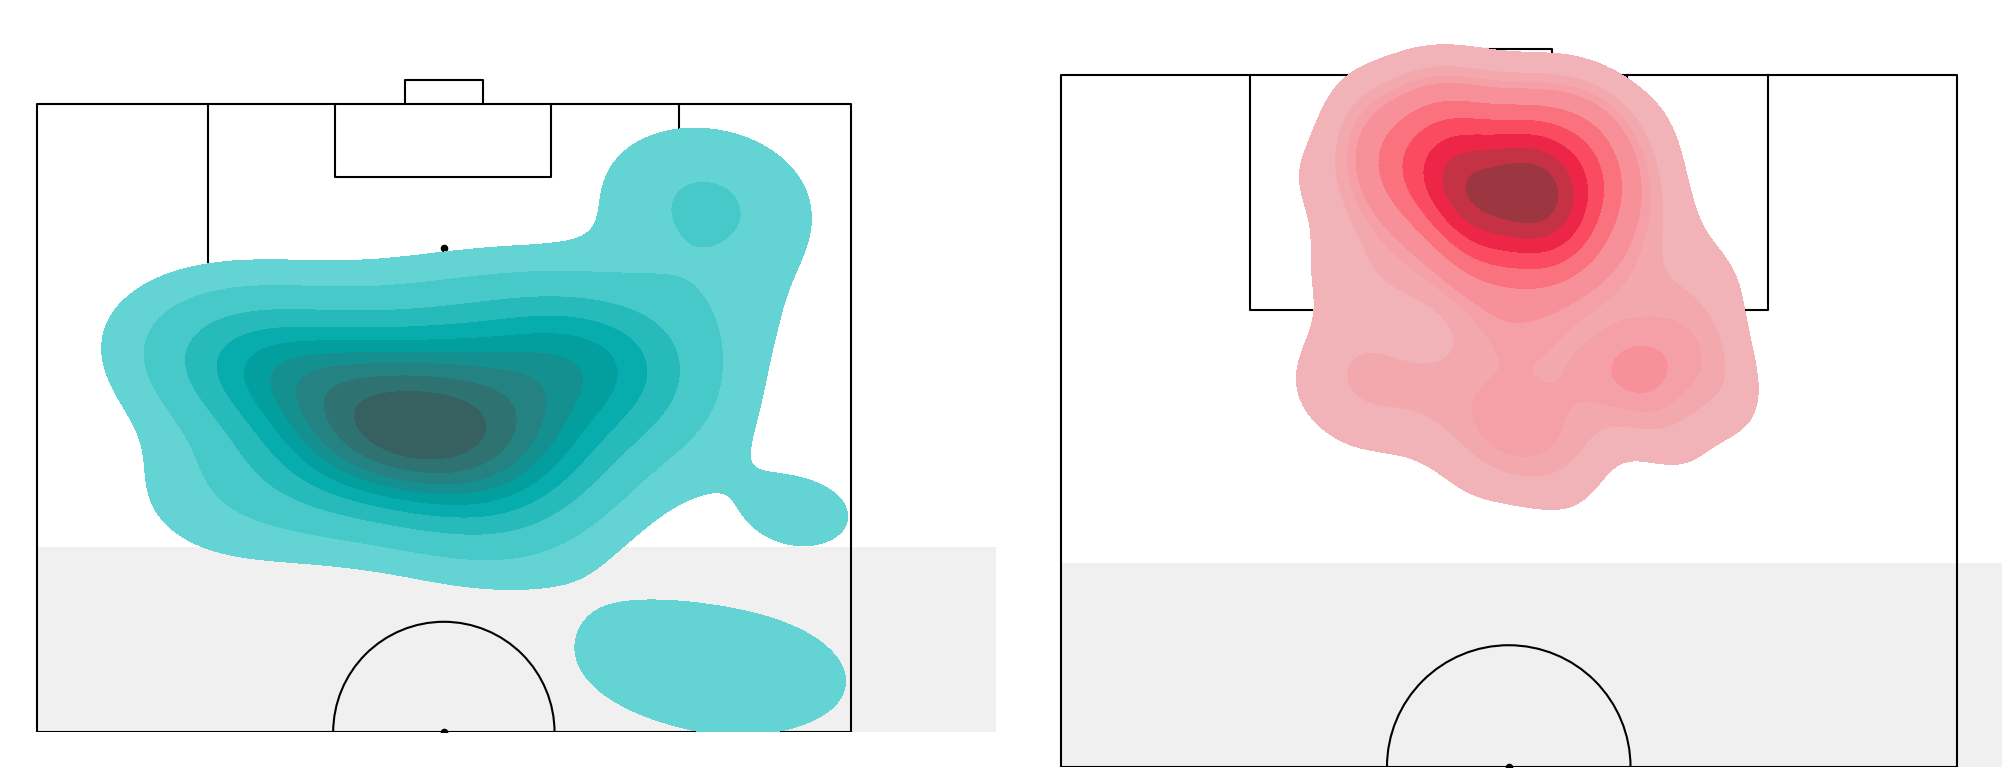

In [ ]:
fig = plt.figure(figsize=(20, 25),constrained_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0])
football_pitch(orientation="vertical", aspect="half", line_color="black", ax=ax)
sns.kdeplot(x=free_kick["Y1"], y=free_kick["X1"], fill="True",color="cyan", levels = 10)

ax1 = fig.add_subplot(gs[1])
football_pitch(orientation="vertical", aspect="half", line_color="black", ax=ax1)
sns.kdeplot(x=corner["Y1"], y=corner["X1"], fill="True",color="crimson", levels = 10)

## Lewandowski Goals vs Total Shots
Now let's plot the goals scored by Lewandowski and the total shots taken by him : 

In [ ]:
lewa = barca_shoots[barca_shoots["player"]=="Robert Lewandowski"]
lewa_goals = lewa[lewa['result']=="Goal"]

<Axes: xlabel='Y1', ylabel='X1'>

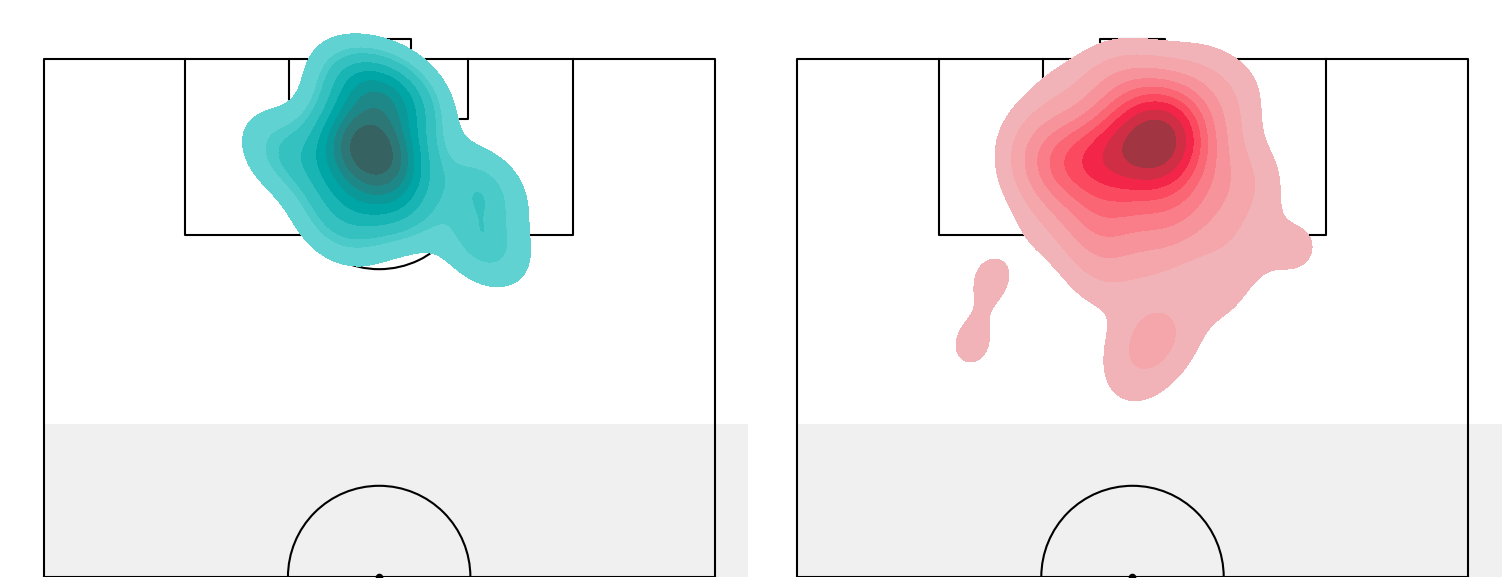

In [ ]:
fig = plt.figure(figsize=(15,20),constrained_layout=True)
gs = fig.add_gridspec(nrows=1,ncols=2)

ax = fig.add_subplot(gs[0])
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax)
sns.kdeplot(x=lewa_goals["Y1"], y=lewa_goals["X1"], fill="True",color="cyan", levels = 10)

ax1 = fig.add_subplot(gs[1])
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax1)
sns.kdeplot(x=lewa["Y1"], y=lewa["X1"], fill="True",color="crimson", levels = 10)

In [ ]:
pedri = barca_shoots[barca_shoots["player"]=="Pedri"]
dembele = barca_shoots[barca_shoots["player"]=="Ousmane Dembélé"]

<Axes: xlabel='Y1', ylabel='X1'>

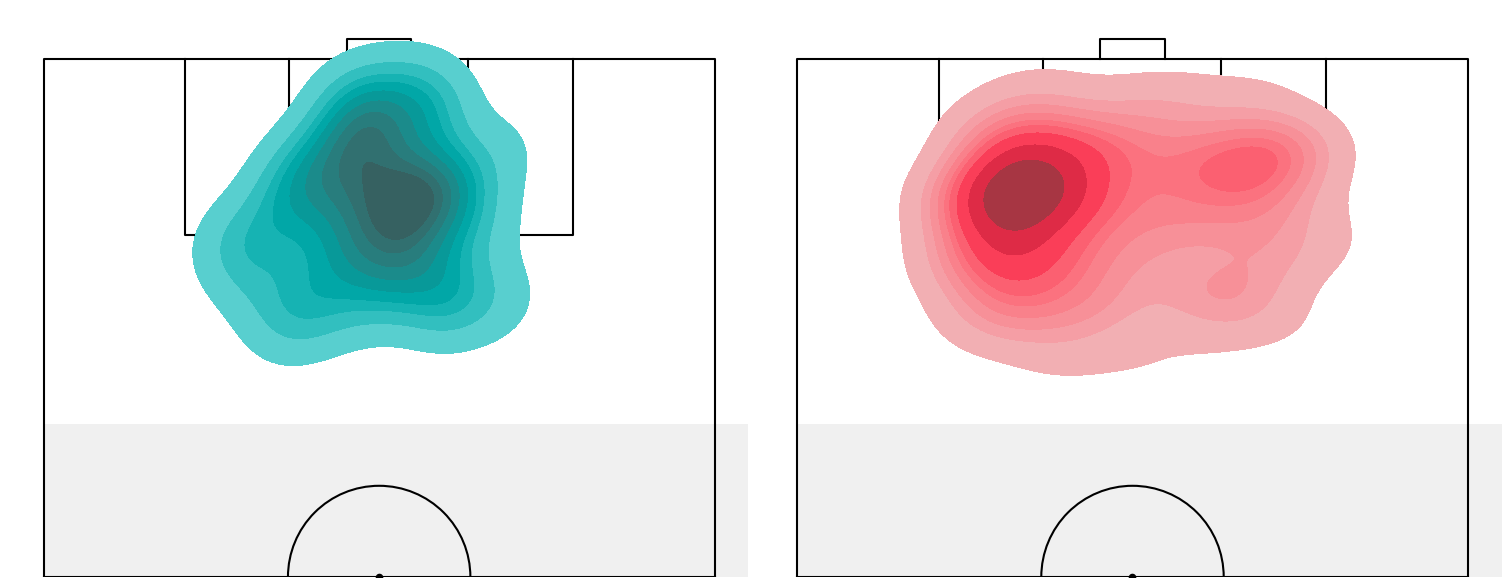

In [ ]:
fig = plt.figure(figsize=(15,20),constrained_layout=True)
gs = fig.add_gridspec(nrows=1,ncols=2)

ax = fig.add_subplot(gs[0])
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax)
sns.kdeplot(x=pedri["Y1"],y=pedri["X1"], fill="True",color="cyan", levels = 10)

ax1 = fig.add_subplot(gs[1])
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax1)
sns.kdeplot(x=dembele["Y1"],y=dembele["X1"], fill="True",color="crimson", levels = 10)

Looking at Dembele's heatmap it's clear he's ambidextrous.

## All Barca Shoots classified by situatuion

<ipython-input-15-64dab8eab72e>:4: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=barca_shoots, x="Y1", y="X1", hue="situation", fill=True,levels=10)


<Axes: xlabel='Y1', ylabel='X1'>

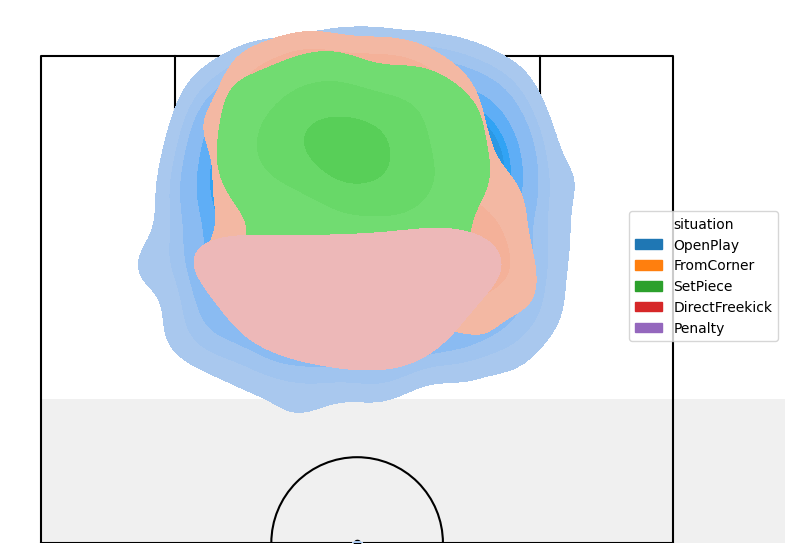

In [ ]:
fig, ax = plt.subplots(figsize=(10, 14))
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax)
#sns.kdeplot(free_kick["X1"],free_kick["Y1"], levels = 800, thresh = 0.3,shade=True,color="cyan")
sns.kdeplot(data=barca_shoots, x="Y1", y="X1", hue="situation", fill=True,levels=10)
